- Time Series Analysis of Tweets Stored

In [21]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import requests
from requests_oauthlib import OAuth1
from requests.models import Response
from time import sleep
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [2]:
accesstoken=os.getenv('accesstoken')
accesstokensecret=os.getenv('accesstokensecret')
consumerkey=os.getenv('consumerkey')
consumersecret=os.getenv('consumersecret')
url='https://api.twitter.com/1.1/account/verify_credentials.json'
auth = OAuth1(consumerkey, consumersecret, accesstoken,accesstokensecret)
requests.get(url, auth=auth)

<Response [200]>

In [3]:
path='Final Project/Storing Data/'

In [128]:
import time
from datetime import datetime

path='Final Project/Storing Data/'


hour_of_the_day={'morning':0,'afternoon':0,'evening':0,'night':0}
days_of_the_week={}

def findHourOfTheDay(houroftheday):
    if houroftheday >=1 and houroftheday<12:
                    return 'morning'
    elif houroftheday>=12 and houroftheday <16:
                    return 'afternoon'
    elif houroftheday>=16 and houroftheday < 20:
                    return 'evening'
    else:
                    return 'night'

#with open(path+'Snapchat_1492802198.json')as f:
for filename in glob.glob(os.path.join(path, '*.json')):
        with open(filename) as f:
            data = json.load(f)

            hours_of_the_day=[]

            for id in data:
                    created_datetime=data[id]['created_at']

                    days=created_datetime.split(' ')[0]
                    #print("Days : ", days)

                    timeoftheday=created_datetime.split(' ')[3]
                    #print("time of day : ", timeoftheday)
                    houroftheday=timeoftheday.split(':')[0]
                    houroftheday=int(houroftheday)
                    #print("hour of day : ", houroftheday)

                    #print(houroftheday)

                    if days in days_of_the_week:
                        value={}
                        value = days_of_the_week[days] 
                        hourOfTheDay = findHourOfTheDay(houroftheday) 
                        if hourOfTheDay in value :
                            count =  value[hourOfTheDay]
                            count = count + 1
                            value[hourOfTheDay] = count
                        else:
                            value[hourOfTheDay] = 1
                    else:
                        hourOfTheDay = findHourOfTheDay(houroftheday)
                        valueDict={}
                        valueDict[hourOfTheDay] = 1
                        days_of_the_week[days]  = valueDict
        
    
print(days_of_the_week)

{'Tue': {'afternoon': 100}, 'Thu': {'morning': 100, 'evening': 632, 'night': 267}, 'Fri': {'morning': 424, 'evening': 256, 'afternoon': 100}, 'Sun': {'night': 374, 'evening': 195}, 'Mon': {'night': 100, 'evening': 100}}


In [129]:
df=pd.DataFrame.from_dict(days_of_the_week,orient = 'index',dtype=None).reset_index()
df.replace(np.nan, 0, regex=True,inplace=True)

In [130]:
df.head(10)

,index,afternoon,morning,evening,night
0,Fri,100.0,424.0,256.0,0.0
1,Mon,0.0,0.0,100.0,100.0
2,Sun,0.0,0.0,195.0,374.0
3,Thu,0.0,100.0,632.0,267.0
4,Tue,100.0,0.0,0.0,0.0


In [131]:
df.rename(columns={'index': 'Day_of_the_Week'}, inplace=True)

In [136]:
df.head(5)

,Day_of_the_Week,afternoon,morning,evening,night
0,Fri,100.0,424.0,256.0,0.0
1,Mon,0.0,0.0,100.0,100.0
2,Sun,0.0,0.0,195.0,374.0
3,Thu,0.0,100.0,632.0,267.0
4,Tue,100.0,0.0,0.0,0.0


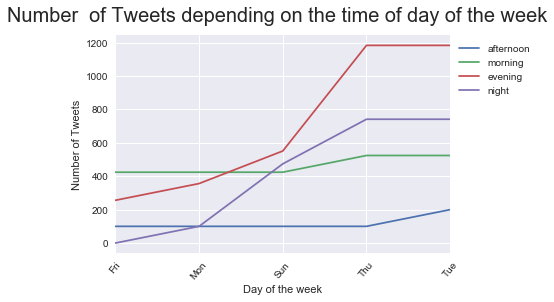

In [150]:
ab = df.cumsum()
plt.figure(); 
ab.plot();
plt.legend(loc= 'upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Day of the week")
plt.ylabel("Number of Tweets")
plt.suptitle("Number  of Tweets depending on the time of day of the week", fontsize=20)
plt.xticks(np.arange(5),df['Day_of_the_Week'],rotation=50)
plt.legend(loc= 'upper left', bbox_to_anchor=(1, 1))
plt.savefig("Final Project/Analysis/Analysis 3/Images/"+"day_of_the_week.jpg",bbox_inches='tight')

In [151]:
import time
from datetime import datetime
days={}
hours_of_the_day={'morning':0,'afternoon':0,'evening':0,'night':0}

for filename in glob.glob(os.path.join(path, '*.json')):
    with open(filename) as f:
        data = json.load(f)
        for id in data:
            created_datetime=data[id]['created_at']
            day=created_datetime.split(' ')[0]
            if day not in days:
                days[day]=1
            else:
                days[day]+=1
            
            timeoftheday=created_datetime.split(' ')[3]
            houroftheday=timeoftheday.split(':')[0]
            houroftheday=int(houroftheday)
            
            
            if houroftheday >=1 and houroftheday<12:
                hours_of_the_day['morning'] += 1
            elif houroftheday>=12 and houroftheday <16:
                hours_of_the_day['afternoon'] += 1
            elif houroftheday>=16 and houroftheday < 20:
                hours_of_the_day['evening'] += 1
            else:
                hours_of_the_day['night'] += 1
    
        
print(hours_of_the_day.items())
print(days.items())


dict_items([('morning', 524), ('evening', 1183), ('afternoon', 200), ('night', 741)])
dict_items([('Tue', 100), ('Thu', 999), ('Fri', 780), ('Sun', 569), ('Mon', 200)])


In [158]:
df1=pd.DataFrame.from_dict(hours_of_the_day,orient = 'index',dtype=None).reset_index()
df2=pd.DataFrame.from_dict(days,orient = 'index',dtype=None).reset_index()
#df.replace(np.nan, 0, regex=True,inplace=True)

In [141]:
df1.head(5)

,index,0
0,morning,524
1,evening,1183
2,afternoon,200
3,night,741


In [144]:
df1.rename(columns={'index': 'Time_Period',0:'Count'}, inplace=True)

In [145]:
df1.head(5)

,Time_Period,Count
0,morning,524
1,evening,1183
2,afternoon,200
3,night,741


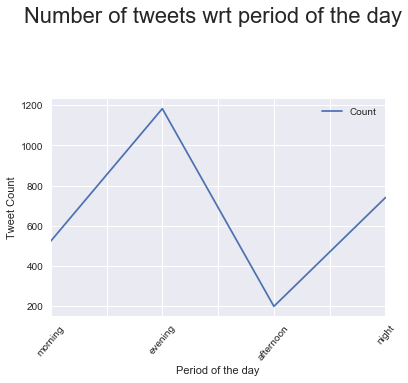

In [149]:
plt.figure(figsize=(25,8))
df1.plot(x="Time_Period", y="Count")
plt.xlabel("Period of the day")
plt.ylabel("Tweet Count")
plt.suptitle("Number of tweets wrt period of the day", y=1.2, fontsize=22)
plt.xticks(rotation=50)
plt.savefig("Final Project/Analysis/Analysis 3/Images/"+"tweets_time_period.png", bbox_inches='tight')

In [159]:
df2.head(5)

,index,0
0,Tue,100
1,Thu,999
2,Fri,780
3,Sun,569
4,Mon,200


In [160]:
df2.rename(columns={'index': 'Days',0:'Count'}, inplace=True)

In [161]:
df2

,Days,Count
0,Tue,100
1,Thu,999
2,Fri,780
3,Sun,569
4,Mon,200


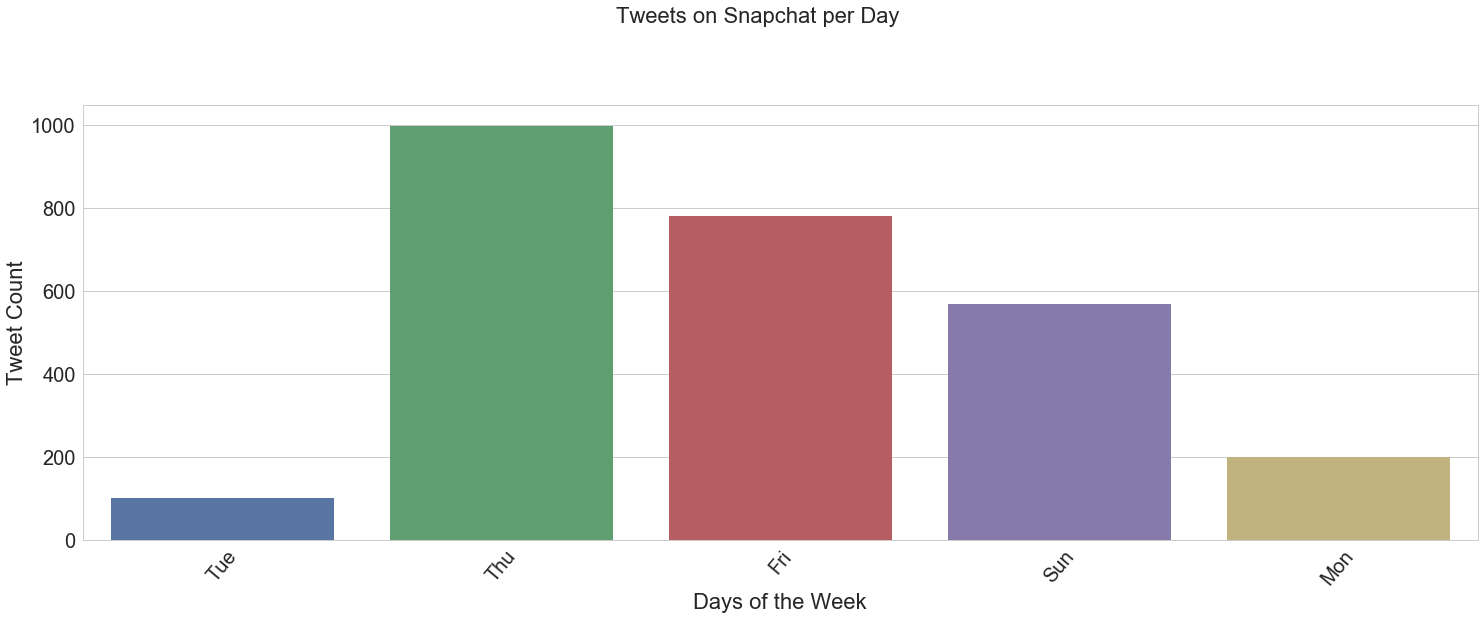

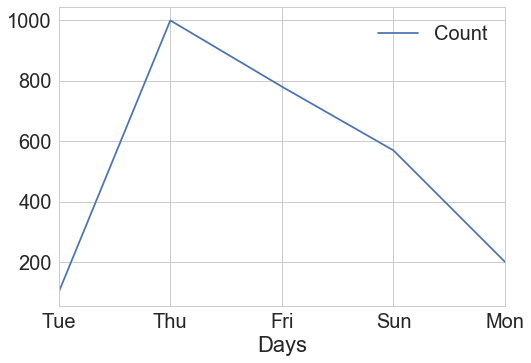

In [164]:
import seaborn as sns

plt.figure(figsize=(25,8))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2)
sns.barplot(x="Days", y="Count", data=df2)
plt.xlabel("Days of the Week")
plt.ylabel("Tweet Count")
plt.suptitle("Tweets on Snapchat per Day", y=1.05, fontsize=22)
plt.xticks(rotation=50)
plt.savefig("Final Project/Analysis/Analysis 3/Images/"+"tweets_day.png", bbox_inches='tight')

df2.plot(x="Days", y="Count")